<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_3/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,4) = 4

In [ ]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

In [12]:
Fs1, track1= wavfile.read('flute4.wav')
Fs2, track2= wavfile.read('piano4.wav')
Fs3, track3= wavfile.read('trumpet4.wav')
Fs4, track4= wavfile.read('violin4.wav')

track1 = track1/32767.0
track2 = track2/32767.0
track3 = track3/32767.0
track4 = track4/32767.0

print('Sampling rate of flute : {}Hz'.format(Fs1))
print('Size of flute signal: {}'.format(track1.shape))
print('Sampling rate of piano : {}Hz'.format(Fs2))
print('Size of piano signal: {}'.format(track2.shape))
print('Sampling rate of trumpet : {}Hz'.format(Fs3))
print('Size of trumpet signal: {}'.format(track3.shape))
print('Sampling rate of violin : {}Hz'.format(Fs4))
print('Size of violin signal: {}'.format(track4.shape))

display(Audio(data=track1, rate=Fs1))
display(Audio(data=track2, rate=Fs2))
display(Audio(data=track3, rate=Fs3))
display(Audio(data=track4, rate=Fs4))


Sampling rate of flute : 11025Hz
Size of flute signal: (36750,)
Sampling rate of piano : 11025Hz
Size of piano signal: (11250,)
Sampling rate of trumpet : 11025Hz
Size of trumpet signal: (86083,)
Sampling rate of violin : 11025Hz
Size of violin signal: (36750,)


In [ ]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    Y = 20*np.log(X)
    N = Fs * np.arange(0, C) / len(x);
    return N, Y
    
frequency_1, magnitude_spectrum_1 = mag_spec(track1, Fs1, Fs1/2)
frequency_2, magnitude_spectrum_2 = mag_spec(track2, Fs2, Fs2/2)
frequency_3, magnitude_spectrum_3 = mag_spec(track3, Fs3, Fs3/2)
frequency_4, magnitude_spectrum_4 = mag_spec(track4, Fs4, Fs4/2)

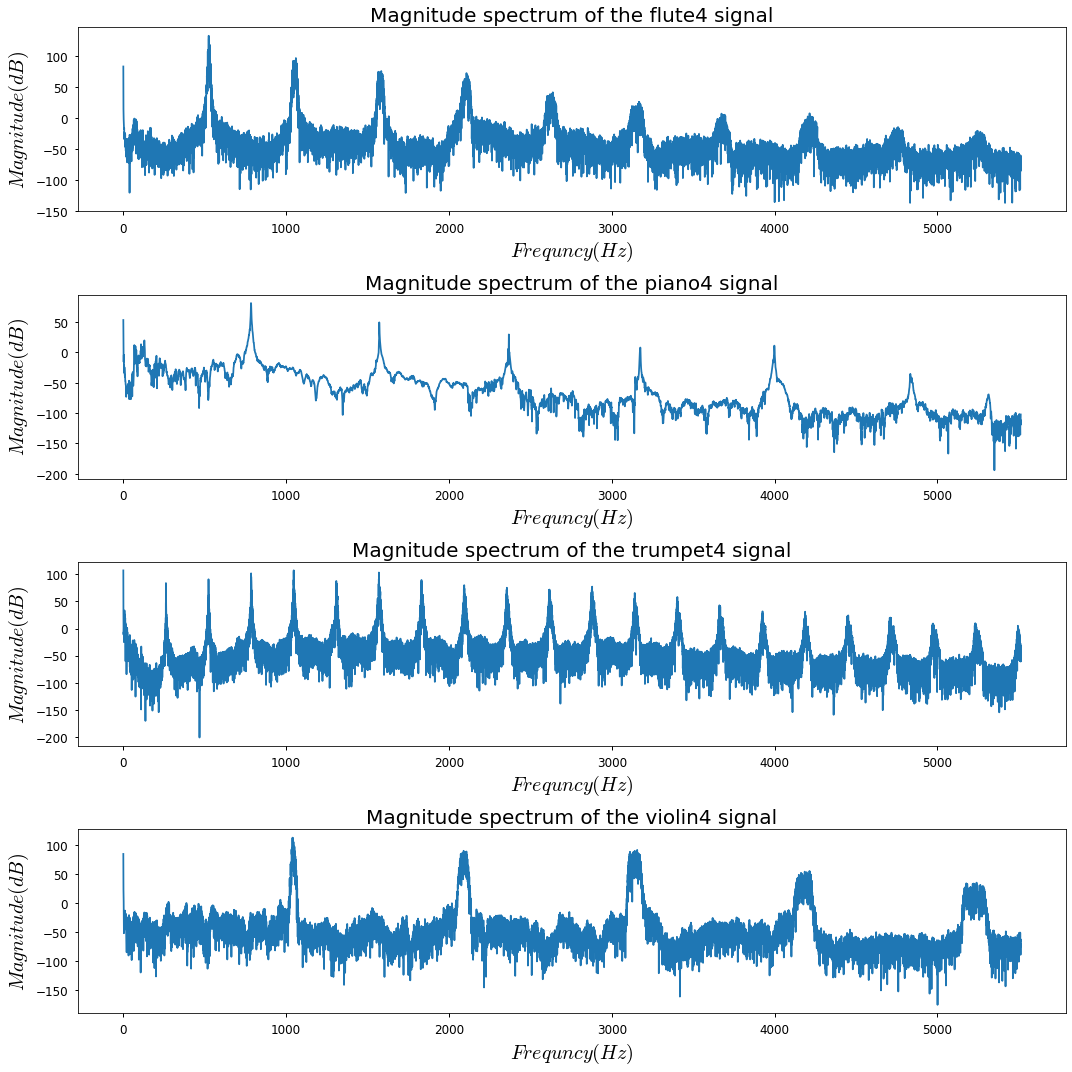

In [15]:
title = ['Magnitude spectrum of the flute4 signal','Magnitude spectrum of the piano4 signal','Magnitude spectrum of the trumpet4 signal','Magnitude spectrum of the violin4 signal']
fig, axs = plt.subplots(4, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(frequency_1, magnitude_spectrum_1, xaxis_label=r'$Frequncy(Hz)$', yaxis_label=r'$Magnitude(dB)$', row=0)
plot_signal(frequency_2, magnitude_spectrum_2, xaxis_label=r'$Frequncy(Hz)$', yaxis_label=r'$Magnitude(dB)$', row=1)
plot_signal(frequency_3, magnitude_spectrum_3, xaxis_label=r'$Frequncy(Hz)$', yaxis_label=r'$Magnitude(dB)$', row=2)
plot_signal(frequency_4, magnitude_spectrum_4, xaxis_label=r'$Frequncy(Hz)$', yaxis_label=r'$Magnitude(dB)$', row=3)
fig.savefig('fig1.png')